# Keras with Mandy - Part 1

This is a code-along with Mandy from [DeepLizard.com]( https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL)

 <img src="DeepLizard_logo.png" width="200" align="left"/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation-and-Processing" data-toc-modified-id="Data-Preparation-and-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation and Processing</a></span><ul class="toc-item"><li><span><a href="#Example-Data-(Clinical-Trial)" data-toc-modified-id="Example-Data-(Clinical-Trial)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example Data (Clinical Trial)</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot data</a></span></li><li><span><a href="#Make-NumPy-arrays" data-toc-modified-id="Make-NumPy-arrays-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Make NumPy arrays</a></span></li><li><span><a href="#Shuffle-the-data" data-toc-modified-id="Shuffle-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Shuffle the data</a></span></li><li><span><a href="#Rescale-the-the-data" data-toc-modified-id="Rescale-the-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rescale the the data</a></span></li></ul></li><li><span><a href="#Keras-TensorFlow-model" data-toc-modified-id="Keras-TensorFlow-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Keras TensorFlow model</a></span><ul class="toc-item"><li><span><a href="#Set-up-Tensorflow-and-Keras" data-toc-modified-id="Set-up-Tensorflow-and-Keras-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set up Tensorflow and Keras</a></span></li><li><span><a href="#Run-Tensorflow-on-NVidia-GPU" data-toc-modified-id="Run-Tensorflow-on-NVidia-GPU-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run Tensorflow on NVidia GPU</a></span></li><li><span><a href="#Define-the-model-layers" data-toc-modified-id="Define-the-model-layers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define the model layers</a></span></li></ul></li></ul></div>

## Data Preparation and Processing

[the video starts at ...](https://www.youtube.com/watch?v=qFJeN9V1ZsI&feature=youtu.be&t=647)

In [1]:
## Uncomment for the first run
# !pip install matplotlib
# !pip install -U scikit-learn
# !conda update --all -y

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_lables = []
train_samples = []

### Example Data (Clinical Trial)
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trail had 2100 participants. Half were under 65 years old, half were older.
- Around 95% of patients ...

[the video starts at ..](https://youtu.be/qFJeN9V1ZsI?t=750)


In [4]:
for i in range (50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_lables.append(1) # side effects
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_lables.append(0) # no side effects
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_lables.append(0)
    
    # The ~95% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_lables.append(1)
    

### Plot data

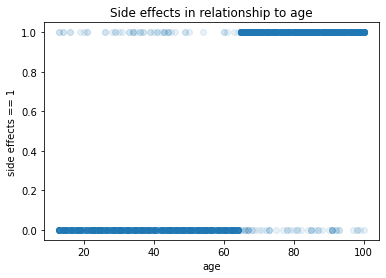

In [5]:
# This plot is not in the video, but it is useful to visualize the data
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(train_samples, train_lables, alpha=0.1)
plt.title('Side effects in relationship to age')
plt.xlabel('age')
plt.ylabel('side effects == 1')
plt.show()

### Make NumPy arrays

[the video continues from 16:02](https://youtu.be/qFJeN9V1ZsI?t=962)

In [6]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)

### Shuffle the data

In [7]:
train_lables, train_samples = shuffle(train_lables, train_samples)

### Rescale the the data

We are rescaling the age data from range of (16 to 100) to (-1 to 1).

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

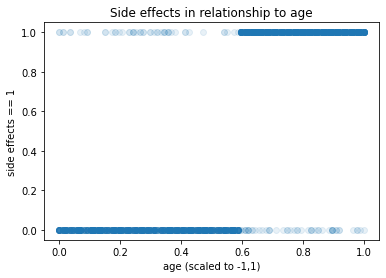

In [9]:
# This plot is not in the video, but it is useful to visualize the data
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(scaled_train_samples, train_lables, alpha=0.1)
plt.title('Side effects in relationship to age')
plt.xlabel('age (scaled to -1,1)')
plt.ylabel('side effects == 1')
plt.show()

##  Keras TensorFlow model

[the video continues from 18:39](https://youtu.be/qFJeN9V1ZsI?t=1119)

### Set up Tensorflow and Keras

To install a new Tensorflow conda enviroment in commad line:

see my [blog post](https://ukidlucas.blogspot.com/2018/10/ipykernel.html)

In [10]:
import tensorflow as tf

- [CategoricalCrossentropy class](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### Run Tensorflow on NVidia GPU

If you have Nvidia GPU

In [12]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
num_gpu_available = len(physical_devices)
print("Num GPU Available: ", num_gpu_available)

Num GPU Available:  0


In [13]:
if (num_gpu_available > 0):
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("NVidia GPU is being used")

### Define the model layers

- input layer (not explicitly declared)
- hidden dense (fully connected) layer with (arbitrary) 16 nodes (units)
    - relu function returns 0 for anything below zero and value for anything above zero
- hidden dense (fully connected) layer with (arbitrary) 32 nodes (units)
    - relu function returns 0 for anything below zero and value for anything above zero
- output dense (fully connected) layer with resulting (side effects, or not) 2 nodes (units)
    - softmax function returns probablity

In [14]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Training the model
    
    
this section covers the video from [24:38](https://youtu.be/qFJeN9V1ZsI?t=1477) to 29:50.

In [16]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
result = model.fit(
    x=scaled_train_samples,
    y=train_lables,
    batch_size=10,
    epochs=15,               # train all data x times
    shuffle=True,            # default True
    verbose=2
)

Train on 2100 samples
Epoch 1/15
2100/2100 - 0s - loss: 0.6339 - accuracy: 0.5552
Epoch 2/15
2100/2100 - 0s - loss: 0.6018 - accuracy: 0.6614
Epoch 3/15
2100/2100 - 0s - loss: 0.5697 - accuracy: 0.7219
Epoch 4/15
2100/2100 - 0s - loss: 0.5368 - accuracy: 0.7629
Epoch 5/15
2100/2100 - 0s - loss: 0.5004 - accuracy: 0.8024
Epoch 6/15
2100/2100 - 0s - loss: 0.4641 - accuracy: 0.8410
Epoch 7/15
2100/2100 - 0s - loss: 0.4312 - accuracy: 0.8638
Epoch 8/15
2100/2100 - 0s - loss: 0.4023 - accuracy: 0.8786
Epoch 9/15
2100/2100 - 0s - loss: 0.3780 - accuracy: 0.8924
Epoch 10/15
2100/2100 - 0s - loss: 0.3578 - accuracy: 0.9014
Epoch 11/15
2100/2100 - 0s - loss: 0.3410 - accuracy: 0.9052
Epoch 12/15
2100/2100 - 0s - loss: 0.3272 - accuracy: 0.9114
Epoch 13/15
2100/2100 - 0s - loss: 0.3159 - accuracy: 0.9143
Epoch 14/15
2100/2100 - 0s - loss: 0.3068 - accuracy: 0.9162
Epoch 15/15
2100/2100 - 0s - loss: 0.2993 - accuracy: 0.9200


In [18]:
result

## Validation

this section covers the video from [29:50](https://youtu.be/qFJeN9V1ZsI?t=1477) to 39:28.

Overfitting: learning well on the training data, but not able to "generalize" in order to perform on the new (validation) data.

In [19]:
result = model.fit(
    x=scaled_train_samples,
    y=train_lables,
    validation_split=0.1,
    batch_size=25,
    epochs=2000,               # train all data x times
    shuffle=True,            # default True, the prior shuffle of the training data is still needed
    verbose=1
)

Train on 1890 samples, validate on 210 samples
Epoch 1/2000
1890/1890 [==============================] - 0s 146us/sample - loss: 0.2917 - accuracy: 0.9196 - val_loss: 0.3233 - val_accuracy: 0.9048
Epoch 2/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.2894 - accuracy: 0.9249 - val_loss: 0.3211 - val_accuracy: 0.9048
Epoch 3/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2875 - accuracy: 0.9249 - val_loss: 0.3204 - val_accuracy: 0.9048
Epoch 4/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2858 - accuracy: 0.9206 - val_loss: 0.3181 - val_accuracy: 0.9048
Epoch 5/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2837 - accuracy: 0.9249 - val_loss: 0.3168 - val_accuracy: 0.9048
Epoch 6/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2822 - accuracy: 0.9249 - val_loss: 0.3161 - val_accuracy: 0.9048
Epoch 7/2000
1890/1890 [==============================] - 

1890/1890 [==============================] - 0s 46us/sample - loss: 0.2493 - accuracy: 0.9349 - val_loss: 0.2803 - val_accuracy: 0.9286
Epoch 56/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2493 - accuracy: 0.9344 - val_loss: 0.2790 - val_accuracy: 0.9429
Epoch 57/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2486 - accuracy: 0.9429 - val_loss: 0.2801 - val_accuracy: 0.9286
Epoch 58/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2483 - accuracy: 0.9370 - val_loss: 0.2805 - val_accuracy: 0.9286
Epoch 59/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2480 - accuracy: 0.9339 - val_loss: 0.2800 - val_accuracy: 0.9286
Epoch 60/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2477 - accuracy: 0.9339 - val_loss: 0.2798 - val_accuracy: 0.9286
Epoch 61/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2474 - accuracy: 0.9397 - val_

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2374 - accuracy: 0.9434 - val_loss: 0.2746 - val_accuracy: 0.9429
Epoch 110/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2372 - accuracy: 0.9434 - val_loss: 0.2739 - val_accuracy: 0.9429
Epoch 111/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2370 - accuracy: 0.9434 - val_loss: 0.2745 - val_accuracy: 0.9429
Epoch 112/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2370 - accuracy: 0.9434 - val_loss: 0.2743 - val_accuracy: 0.9429
Epoch 113/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2370 - accuracy: 0.9434 - val_loss: 0.2735 - val_accuracy: 0.9429
Epoch 114/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2366 - accuracy: 0.9434 - val_loss: 0.2736 - val_accuracy: 0.9429
Epoch 115/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2365 - accuracy: 0.9434 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.2321 - accuracy: 0.9434 - val_loss: 0.2720 - val_accuracy: 0.9429
Epoch 164/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2321 - accuracy: 0.9444 - val_loss: 0.2716 - val_accuracy: 0.9429
Epoch 165/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.2319 - accuracy: 0.9434 - val_loss: 0.2721 - val_accuracy: 0.9429
Epoch 166/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2319 - accuracy: 0.9434 - val_loss: 0.2723 - val_accuracy: 0.9429
Epoch 167/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2318 - accuracy: 0.9434 - val_loss: 0.2725 - val_accuracy: 0.9429
Epoch 168/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2317 - accuracy: 0.9434 - val_loss: 0.2715 - val_accuracy: 0.9429
Epoch 169/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.2317 - accuracy: 0.9434 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2283 - accuracy: 0.9487 - val_loss: 0.2691 - val_accuracy: 0.9429
Epoch 218/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2282 - accuracy: 0.9513 - val_loss: 0.2681 - val_accuracy: 0.9524
Epoch 219/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2280 - accuracy: 0.9519 - val_loss: 0.2682 - val_accuracy: 0.9524
Epoch 220/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2280 - accuracy: 0.9466 - val_loss: 0.2688 - val_accuracy: 0.9429
Epoch 221/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2280 - accuracy: 0.9455 - val_loss: 0.2676 - val_accuracy: 0.9524
Epoch 222/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2280 - accuracy: 0.9508 - val_loss: 0.2683 - val_accuracy: 0.9429
Epoch 223/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2279 - accuracy: 0.9513 

1890/1890 [==============================] - 0s 48us/sample - loss: 0.2248 - accuracy: 0.9524 - val_loss: 0.2637 - val_accuracy: 0.9524
Epoch 272/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2247 - accuracy: 0.9524 - val_loss: 0.2638 - val_accuracy: 0.9524
Epoch 273/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2245 - accuracy: 0.9508 - val_loss: 0.2628 - val_accuracy: 0.9524
Epoch 274/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2245 - accuracy: 0.9524 - val_loss: 0.2630 - val_accuracy: 0.9524
Epoch 275/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.2245 - accuracy: 0.9492 - val_loss: 0.2633 - val_accuracy: 0.9524
Epoch 276/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2245 - accuracy: 0.9524 - val_loss: 0.2628 - val_accuracy: 0.9524
Epoch 277/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2244 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2213 - accuracy: 0.9524 - val_loss: 0.2577 - val_accuracy: 0.9524
Epoch 326/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2213 - accuracy: 0.9524 - val_loss: 0.2582 - val_accuracy: 0.9524
Epoch 327/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2212 - accuracy: 0.9450 - val_loss: 0.2570 - val_accuracy: 0.9524
Epoch 328/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2212 - accuracy: 0.9524 - val_loss: 0.2579 - val_accuracy: 0.9524
Epoch 329/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2210 - accuracy: 0.9524 - val_loss: 0.2572 - val_accuracy: 0.9524
Epoch 330/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2211 - accuracy: 0.9529 - val_loss: 0.2584 - val_accuracy: 0.9429
Epoch 331/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2211 - accuracy: 0.9487 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.2184 - accuracy: 0.9524 - val_loss: 0.2525 - val_accuracy: 0.9524
Epoch 380/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2183 - accuracy: 0.9524 - val_loss: 0.2528 - val_accuracy: 0.9524
Epoch 381/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2184 - accuracy: 0.9524 - val_loss: 0.2535 - val_accuracy: 0.9524
Epoch 382/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2185 - accuracy: 0.9519 - val_loss: 0.2527 - val_accuracy: 0.9524
Epoch 383/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2182 - accuracy: 0.9497 - val_loss: 0.2513 - val_accuracy: 0.9524
Epoch 384/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2181 - accuracy: 0.9524 - val_loss: 0.2515 - val_accuracy: 0.9524
Epoch 385/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2181 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.2159 - accuracy: 0.9524 - val_loss: 0.2466 - val_accuracy: 0.9524
Epoch 434/2000
1890/1890 [==============================] - 0s 50us/sample - loss: 0.2159 - accuracy: 0.9524 - val_loss: 0.2461 - val_accuracy: 0.9524
Epoch 435/2000
1890/1890 [==============================] - 0s 52us/sample - loss: 0.2158 - accuracy: 0.9524 - val_loss: 0.2465 - val_accuracy: 0.9524
Epoch 436/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2159 - accuracy: 0.9524 - val_loss: 0.2455 - val_accuracy: 0.9524
Epoch 437/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.2158 - accuracy: 0.9524 - val_loss: 0.2466 - val_accuracy: 0.9524
Epoch 438/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2157 - accuracy: 0.9524 - val_loss: 0.2470 - val_accuracy: 0.9524
Epoch 439/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2157 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.2140 - accuracy: 0.9524 - val_loss: 0.2419 - val_accuracy: 0.9524
Epoch 488/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2138 - accuracy: 0.9524 - val_loss: 0.2419 - val_accuracy: 0.9524
Epoch 489/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2138 - accuracy: 0.9524 - val_loss: 0.2419 - val_accuracy: 0.9524
Epoch 490/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2138 - accuracy: 0.9524 - val_loss: 0.2425 - val_accuracy: 0.9524
Epoch 491/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2138 - accuracy: 0.9492 - val_loss: 0.2418 - val_accuracy: 0.9524
Epoch 492/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2138 - accuracy: 0.9524 - val_loss: 0.2414 - val_accuracy: 0.9524
Epoch 493/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2137 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2119 - accuracy: 0.9524 - val_loss: 0.2388 - val_accuracy: 0.9524
Epoch 542/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2119 - accuracy: 0.9524 - val_loss: 0.2377 - val_accuracy: 0.9524
Epoch 543/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2117 - accuracy: 0.9524 - val_loss: 0.2380 - val_accuracy: 0.9524
Epoch 544/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2118 - accuracy: 0.9524 - val_loss: 0.2379 - val_accuracy: 0.9524
Epoch 545/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2117 - accuracy: 0.9524 - val_loss: 0.2378 - val_accuracy: 0.9524
Epoch 546/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2119 - accuracy: 0.9524 - val_loss: 0.2377 - val_accuracy: 0.9524
Epoch 547/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2116 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 50us/sample - loss: 0.2093 - accuracy: 0.9524 - val_loss: 0.2338 - val_accuracy: 0.9524
Epoch 596/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2094 - accuracy: 0.9524 - val_loss: 0.2336 - val_accuracy: 0.9524
Epoch 597/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2092 - accuracy: 0.9524 - val_loss: 0.2345 - val_accuracy: 0.9524
Epoch 598/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2092 - accuracy: 0.9524 - val_loss: 0.2344 - val_accuracy: 0.9524
Epoch 599/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2092 - accuracy: 0.9524 - val_loss: 0.2356 - val_accuracy: 0.9524
Epoch 600/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2090 - accuracy: 0.9524 - val_loss: 0.2335 - val_accuracy: 0.9524
Epoch 601/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2089 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2070 - accuracy: 0.9524 - val_loss: 0.2303 - val_accuracy: 0.9524
Epoch 650/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2069 - accuracy: 0.9524 - val_loss: 0.2298 - val_accuracy: 0.9524
Epoch 651/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2069 - accuracy: 0.9524 - val_loss: 0.2305 - val_accuracy: 0.9524
Epoch 652/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2069 - accuracy: 0.9524 - val_loss: 0.2310 - val_accuracy: 0.9524
Epoch 653/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.2070 - accuracy: 0.9524 - val_loss: 0.2303 - val_accuracy: 0.9524
Epoch 654/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2068 - accuracy: 0.9524 - val_loss: 0.2305 - val_accuracy: 0.9524
Epoch 655/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2067 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.2050 - accuracy: 0.9524 - val_loss: 0.2265 - val_accuracy: 0.9524
Epoch 704/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2049 - accuracy: 0.9524 - val_loss: 0.2269 - val_accuracy: 0.9524
Epoch 705/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2049 - accuracy: 0.9524 - val_loss: 0.2257 - val_accuracy: 0.9524
Epoch 706/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2048 - accuracy: 0.9524 - val_loss: 0.2262 - val_accuracy: 0.9524
Epoch 707/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.2049 - accuracy: 0.9524 - val_loss: 0.2258 - val_accuracy: 0.9524
Epoch 708/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2049 - accuracy: 0.9524 - val_loss: 0.2263 - val_accuracy: 0.9524
Epoch 709/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2047 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2033 - accuracy: 0.9524 - val_loss: 0.2226 - val_accuracy: 0.9524
Epoch 758/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2034 - accuracy: 0.9524 - val_loss: 0.2235 - val_accuracy: 0.9524
Epoch 759/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2034 - accuracy: 0.9524 - val_loss: 0.2225 - val_accuracy: 0.9524
Epoch 760/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2033 - accuracy: 0.9524 - val_loss: 0.2223 - val_accuracy: 0.9524
Epoch 761/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2034 - accuracy: 0.9524 - val_loss: 0.2222 - val_accuracy: 0.9524
Epoch 762/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2034 - accuracy: 0.9524 - val_loss: 0.2223 - val_accuracy: 0.9524
Epoch 763/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2033 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.2019 - accuracy: 0.9524 - val_loss: 0.2200 - val_accuracy: 0.9524
Epoch 812/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2020 - accuracy: 0.9524 - val_loss: 0.2204 - val_accuracy: 0.9524
Epoch 813/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2021 - accuracy: 0.9524 - val_loss: 0.2206 - val_accuracy: 0.9524
Epoch 814/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.2019 - accuracy: 0.9524 - val_loss: 0.2200 - val_accuracy: 0.9524
Epoch 815/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.2021 - accuracy: 0.9524 - val_loss: 0.2198 - val_accuracy: 0.9524
Epoch 816/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.2020 - accuracy: 0.9524 - val_loss: 0.2192 - val_accuracy: 0.9524
Epoch 817/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2018 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 45us/sample - loss: 0.2007 - accuracy: 0.9524 - val_loss: 0.2175 - val_accuracy: 0.9524
Epoch 866/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.2007 - accuracy: 0.9524 - val_loss: 0.2183 - val_accuracy: 0.9524
Epoch 867/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2008 - accuracy: 0.9524 - val_loss: 0.2174 - val_accuracy: 0.9524
Epoch 868/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2006 - accuracy: 0.9524 - val_loss: 0.2177 - val_accuracy: 0.9524
Epoch 869/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.2005 - accuracy: 0.9524 - val_loss: 0.2175 - val_accuracy: 0.9524
Epoch 870/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.2006 - accuracy: 0.9524 - val_loss: 0.2177 - val_accuracy: 0.9524
Epoch 871/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.2006 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 42us/sample - loss: 0.1994 - accuracy: 0.9524 - val_loss: 0.2159 - val_accuracy: 0.9524
Epoch 920/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1993 - accuracy: 0.9524 - val_loss: 0.2155 - val_accuracy: 0.9524
Epoch 921/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1994 - accuracy: 0.9524 - val_loss: 0.2156 - val_accuracy: 0.9524
Epoch 922/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1992 - accuracy: 0.9524 - val_loss: 0.2158 - val_accuracy: 0.9524
Epoch 923/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1993 - accuracy: 0.9524 - val_loss: 0.2157 - val_accuracy: 0.9524
Epoch 924/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1992 - accuracy: 0.9524 - val_loss: 0.2153 - val_accuracy: 0.9524
Epoch 925/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1992 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1983 - accuracy: 0.9524 - val_loss: 0.2139 - val_accuracy: 0.9524
Epoch 974/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1982 - accuracy: 0.9524 - val_loss: 0.2143 - val_accuracy: 0.9524
Epoch 975/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1984 - accuracy: 0.9524 - val_loss: 0.2134 - val_accuracy: 0.9524
Epoch 976/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1982 - accuracy: 0.9524 - val_loss: 0.2127 - val_accuracy: 0.9524
Epoch 977/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1982 - accuracy: 0.9524 - val_loss: 0.2125 - val_accuracy: 0.9524
Epoch 978/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1983 - accuracy: 0.9524 - val_loss: 0.2139 - val_accuracy: 0.9524
Epoch 979/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1981 - accuracy: 0.9524 

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1974 - accuracy: 0.9524 - val_loss: 0.2118 - val_accuracy: 0.9524
Epoch 1028/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1972 - accuracy: 0.9524 - val_loss: 0.2109 - val_accuracy: 0.9524
Epoch 1029/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1972 - accuracy: 0.9524 - val_loss: 0.2113 - val_accuracy: 0.9524
Epoch 1030/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1973 - accuracy: 0.9524 - val_loss: 0.2113 - val_accuracy: 0.9524
Epoch 1031/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1971 - accuracy: 0.9524 - val_loss: 0.2115 - val_accuracy: 0.9524
Epoch 1032/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1972 - accuracy: 0.9524 - val_loss: 0.2112 - val_accuracy: 0.9524
Epoch 1033/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1972 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1966 - accuracy: 0.9524 - val_loss: 0.2106 - val_accuracy: 0.9524
Epoch 1082/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1967 - accuracy: 0.9524 - val_loss: 0.2103 - val_accuracy: 0.9524
Epoch 1083/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1965 - accuracy: 0.9524 - val_loss: 0.2100 - val_accuracy: 0.9524
Epoch 1084/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1965 - accuracy: 0.9524 - val_loss: 0.2099 - val_accuracy: 0.9524
Epoch 1085/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1963 - accuracy: 0.9524 - val_loss: 0.2104 - val_accuracy: 0.9524
Epoch 1086/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1965 - accuracy: 0.9524 - val_loss: 0.2104 - val_accuracy: 0.9524
Epoch 1087/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1964 - accuracy: 0

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1959 - accuracy: 0.9524 - val_loss: 0.2085 - val_accuracy: 0.9524
Epoch 1136/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1956 - accuracy: 0.9524 - val_loss: 0.2091 - val_accuracy: 0.9524
Epoch 1137/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1958 - accuracy: 0.9524 - val_loss: 0.2090 - val_accuracy: 0.9524
Epoch 1138/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1958 - accuracy: 0.9524 - val_loss: 0.2092 - val_accuracy: 0.9524
Epoch 1139/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1957 - accuracy: 0.9524 - val_loss: 0.2092 - val_accuracy: 0.9524
Epoch 1140/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1958 - accuracy: 0.9524 - val_loss: 0.2094 - val_accuracy: 0.9524
Epoch 1141/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1958 - accuracy: 0

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1951 - accuracy: 0.9524 - val_loss: 0.2088 - val_accuracy: 0.9524
Epoch 1190/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1951 - accuracy: 0.9524 - val_loss: 0.2085 - val_accuracy: 0.9524
Epoch 1191/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1950 - accuracy: 0.9524 - val_loss: 0.2083 - val_accuracy: 0.9524
Epoch 1192/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1950 - accuracy: 0.9524 - val_loss: 0.2074 - val_accuracy: 0.9524
Epoch 1193/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1951 - accuracy: 0.9524 - val_loss: 0.2076 - val_accuracy: 0.9524
Epoch 1194/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1952 - accuracy: 0.9524 - val_loss: 0.2076 - val_accuracy: 0.9524
Epoch 1195/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1951 - accuracy: 0

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1946 - accuracy: 0.9524 - val_loss: 0.2069 - val_accuracy: 0.9524
Epoch 1244/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1943 - accuracy: 0.9524 - val_loss: 0.2073 - val_accuracy: 0.9524
Epoch 1245/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1945 - accuracy: 0.9524 - val_loss: 0.2072 - val_accuracy: 0.9524
Epoch 1246/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1945 - accuracy: 0.9524 - val_loss: 0.2073 - val_accuracy: 0.9524
Epoch 1247/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1945 - accuracy: 0.9524 - val_loss: 0.2075 - val_accuracy: 0.9524
Epoch 1248/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1947 - accuracy: 0.9524 - val_loss: 0.2065 - val_accuracy: 0.9524
Epoch 1249/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1943 - accuracy: 0

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1939 - accuracy: 0.9524 - val_loss: 0.2064 - val_accuracy: 0.9524
Epoch 1298/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1938 - accuracy: 0.9524 - val_loss: 0.2065 - val_accuracy: 0.9524
Epoch 1299/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1939 - accuracy: 0.9524 - val_loss: 0.2065 - val_accuracy: 0.9524
Epoch 1300/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1938 - accuracy: 0.9524 - val_loss: 0.2060 - val_accuracy: 0.9524
Epoch 1301/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1938 - accuracy: 0.9524 - val_loss: 0.2066 - val_accuracy: 0.9524
Epoch 1302/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1938 - accuracy: 0.9524 - val_loss: 0.2064 - val_accuracy: 0.9524
Epoch 1303/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1937 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1936 - accuracy: 0.9524 - val_loss: 0.2049 - val_accuracy: 0.9524
Epoch 1352/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1933 - accuracy: 0.9524 - val_loss: 0.2053 - val_accuracy: 0.9524
Epoch 1353/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1932 - accuracy: 0.9524 - val_loss: 0.2062 - val_accuracy: 0.9524
Epoch 1354/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1935 - accuracy: 0.9524 - val_loss: 0.2058 - val_accuracy: 0.9524
Epoch 1355/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1933 - accuracy: 0.9524 - val_loss: 0.2063 - val_accuracy: 0.9524
Epoch 1356/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1933 - accuracy: 0.9524 - val_loss: 0.2059 - val_accuracy: 0.9524
Epoch 1357/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1932 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1929 - accuracy: 0.9524 - val_loss: 0.2061 - val_accuracy: 0.9524
Epoch 1406/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1928 - accuracy: 0.9524 - val_loss: 0.2059 - val_accuracy: 0.9524
Epoch 1407/2000
1890/1890 [==============================] - 0s 54us/sample - loss: 0.1933 - accuracy: 0.9524 - val_loss: 0.2052 - val_accuracy: 0.9524
Epoch 1408/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1931 - accuracy: 0.9524 - val_loss: 0.2059 - val_accuracy: 0.9524
Epoch 1409/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1929 - accuracy: 0.9524 - val_loss: 0.2052 - val_accuracy: 0.9524
Epoch 1410/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1927 - accuracy: 0.9524 - val_loss: 0.2048 - val_accuracy: 0.9524
Epoch 1411/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1927 - accuracy: 0

1890/1890 [==============================] - 0s 42us/sample - loss: 0.1922 - accuracy: 0.9524 - val_loss: 0.2050 - val_accuracy: 0.9524
Epoch 1460/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1923 - accuracy: 0.9524 - val_loss: 0.2046 - val_accuracy: 0.9524
Epoch 1461/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1923 - accuracy: 0.9524 - val_loss: 0.2046 - val_accuracy: 0.9524
Epoch 1462/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1922 - accuracy: 0.9524 - val_loss: 0.2052 - val_accuracy: 0.9524
Epoch 1463/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.1922 - accuracy: 0.9524 - val_loss: 0.2046 - val_accuracy: 0.9524
Epoch 1464/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1924 - accuracy: 0.9524 - val_loss: 0.2049 - val_accuracy: 0.9524
Epoch 1465/2000
1890/1890 [==============================] - 0s 53us/sample - loss: 0.1923 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1921 - accuracy: 0.9524 - val_loss: 0.2040 - val_accuracy: 0.9524
Epoch 1514/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1919 - accuracy: 0.9524 - val_loss: 0.2049 - val_accuracy: 0.9524
Epoch 1515/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1923 - accuracy: 0.9524 - val_loss: 0.2055 - val_accuracy: 0.9524
Epoch 1516/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1917 - accuracy: 0.9524 - val_loss: 0.2045 - val_accuracy: 0.9524
Epoch 1517/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1923 - accuracy: 0.9524 - val_loss: 0.2042 - val_accuracy: 0.9524
Epoch 1518/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1919 - accuracy: 0.9524 - val_loss: 0.2051 - val_accuracy: 0.9524
Epoch 1519/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1918 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1915 - accuracy: 0.9524 - val_loss: 0.2038 - val_accuracy: 0.9524
Epoch 1568/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1917 - accuracy: 0.9524 - val_loss: 0.2036 - val_accuracy: 0.9524
Epoch 1569/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1916 - accuracy: 0.9524 - val_loss: 0.2034 - val_accuracy: 0.9524
Epoch 1570/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1916 - accuracy: 0.9524 - val_loss: 0.2037 - val_accuracy: 0.9524
Epoch 1571/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1915 - accuracy: 0.9524 - val_loss: 0.2037 - val_accuracy: 0.9524
Epoch 1572/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1915 - accuracy: 0.9524 - val_loss: 0.2037 - val_accuracy: 0.9524
Epoch 1573/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1915 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1911 - accuracy: 0.9524 - val_loss: 0.2034 - val_accuracy: 0.9524
Epoch 1622/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1912 - accuracy: 0.9524 - val_loss: 0.2031 - val_accuracy: 0.9524
Epoch 1623/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1912 - accuracy: 0.9524 - val_loss: 0.2034 - val_accuracy: 0.9524
Epoch 1624/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1912 - accuracy: 0.9524 - val_loss: 0.2034 - val_accuracy: 0.9524
Epoch 1625/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1914 - accuracy: 0.9524 - val_loss: 0.2033 - val_accuracy: 0.9524
Epoch 1626/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1911 - accuracy: 0.9524 - val_loss: 0.2035 - val_accuracy: 0.9524
Epoch 1627/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1910 - accuracy: 0

1890/1890 [==============================] - 0s 42us/sample - loss: 0.1910 - accuracy: 0.9524 - val_loss: 0.2036 - val_accuracy: 0.9524
Epoch 1676/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1908 - accuracy: 0.9524 - val_loss: 0.2038 - val_accuracy: 0.9524
Epoch 1677/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1909 - accuracy: 0.9524 - val_loss: 0.2029 - val_accuracy: 0.9524
Epoch 1678/2000
1890/1890 [==============================] - 0s 41us/sample - loss: 0.1907 - accuracy: 0.9524 - val_loss: 0.2027 - val_accuracy: 0.9524
Epoch 1679/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1910 - accuracy: 0.9524 - val_loss: 0.2027 - val_accuracy: 0.9524
Epoch 1680/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1910 - accuracy: 0.9524 - val_loss: 0.2035 - val_accuracy: 0.9524
Epoch 1681/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1909 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1906 - accuracy: 0.9524 - val_loss: 0.2032 - val_accuracy: 0.9524
Epoch 1730/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1904 - accuracy: 0.9524 - val_loss: 0.2029 - val_accuracy: 0.9524
Epoch 1731/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1906 - accuracy: 0.9524 - val_loss: 0.2023 - val_accuracy: 0.9524
Epoch 1732/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1908 - accuracy: 0.9524 - val_loss: 0.2038 - val_accuracy: 0.9524
Epoch 1733/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1906 - accuracy: 0.9524 - val_loss: 0.2031 - val_accuracy: 0.9524
Epoch 1734/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1904 - accuracy: 0.9524 - val_loss: 0.2029 - val_accuracy: 0.9524
Epoch 1735/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1907 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1902 - accuracy: 0.9524 - val_loss: 0.2028 - val_accuracy: 0.9524
Epoch 1784/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1904 - accuracy: 0.9524 - val_loss: 0.2026 - val_accuracy: 0.9524
Epoch 1785/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1902 - accuracy: 0.9524 - val_loss: 0.2022 - val_accuracy: 0.9524
Epoch 1786/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1902 - accuracy: 0.9524 - val_loss: 0.2025 - val_accuracy: 0.9524
Epoch 1787/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1901 - accuracy: 0.9524 - val_loss: 0.2029 - val_accuracy: 0.9524
Epoch 1788/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1901 - accuracy: 0.9524 - val_loss: 0.2032 - val_accuracy: 0.9524
Epoch 1789/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1905 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1900 - accuracy: 0.9524 - val_loss: 0.2028 - val_accuracy: 0.9524
Epoch 1838/2000
1890/1890 [==============================] - 0s 53us/sample - loss: 0.1899 - accuracy: 0.9524 - val_loss: 0.2020 - val_accuracy: 0.9524
Epoch 1839/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1900 - accuracy: 0.9524 - val_loss: 0.2023 - val_accuracy: 0.9524
Epoch 1840/2000
1890/1890 [==============================] - 0s 53us/sample - loss: 0.1901 - accuracy: 0.9524 - val_loss: 0.2021 - val_accuracy: 0.9524
Epoch 1841/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1899 - accuracy: 0.9524 - val_loss: 0.2027 - val_accuracy: 0.9524
Epoch 1842/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1901 - accuracy: 0.9524 - val_loss: 0.2031 - val_accuracy: 0.9524
Epoch 1843/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1901 - accuracy: 0

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1896 - accuracy: 0.9524 - val_loss: 0.2017 - val_accuracy: 0.9524
Epoch 1892/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1898 - accuracy: 0.9524 - val_loss: 0.2018 - val_accuracy: 0.9524
Epoch 1893/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1899 - accuracy: 0.9524 - val_loss: 0.2017 - val_accuracy: 0.9524
Epoch 1894/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1895 - accuracy: 0.9524 - val_loss: 0.2015 - val_accuracy: 0.9524
Epoch 1895/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1898 - accuracy: 0.9524 - val_loss: 0.2018 - val_accuracy: 0.9524
Epoch 1896/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1898 - accuracy: 0.9524 - val_loss: 0.2026 - val_accuracy: 0.9524
Epoch 1897/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1896 - accuracy: 0

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1895 - accuracy: 0.9524 - val_loss: 0.2021 - val_accuracy: 0.9524
Epoch 1946/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1894 - accuracy: 0.9524 - val_loss: 0.2019 - val_accuracy: 0.9524
Epoch 1947/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1895 - accuracy: 0.9524 - val_loss: 0.2019 - val_accuracy: 0.9524
Epoch 1948/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1896 - accuracy: 0.9524 - val_loss: 0.2023 - val_accuracy: 0.9524
Epoch 1949/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1894 - accuracy: 0.9524 - val_loss: 0.2018 - val_accuracy: 0.9524
Epoch 1950/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1893 - accuracy: 0.9524 - val_loss: 0.2015 - val_accuracy: 0.9524
Epoch 1951/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1894 - accuracy: 0

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1895 - accuracy: 0.9524 - val_loss: 0.2011 - val_accuracy: 0.9524
Epoch 2000/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1890 - accuracy: 0.9524 - val_loss: 0.2017 - val_accuracy: 0.9524


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


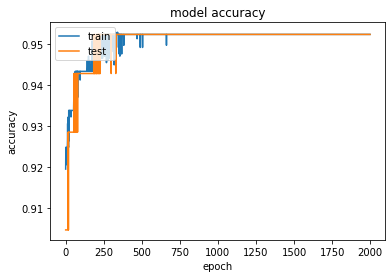

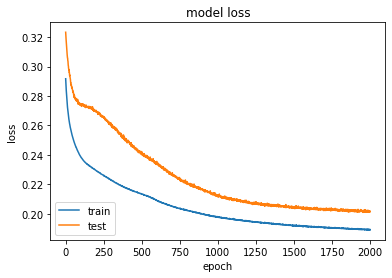

In [20]:
print(result.history.keys())

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

## Prediction (Inference)

this section covers the video from [39:28](https://youtu.be/qFJeN9V1ZsI?t=2368) to 39:14.

In [ ]:
!conda env export > environment_py_36_TensorFlow.yml